In [20]:
# Imports
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve

In [21]:
# Dataset for Classification
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

print("Samples: ", len(x))

Samples:  569


In [22]:
param_range = range(1, 30)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), x_train, y_train, param_name="n_neighbors", 
    param_range=param_range, cv=10, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

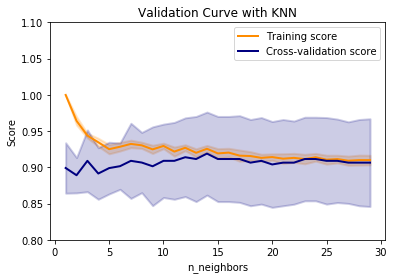

In [23]:
plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()